A base de dados selecionada para esse trabalho foi a correspondente aos dados de esquistossomose do ano de 2018.

Antes de iniciar, vamos importar as bibliotecas necessárias e carregar os dados que serão utilizados.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

codigos_estados = {35: 'SP', 41: 'PR', 42: 'SC', 43: 'RS', 50: 'MS', 11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO', 21: 'MA', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA', 31: 'MG', 33: 'RJ', 51: 'MT', 52: 'GO', 53: 'DF', 22: 'PI', 23: 'CE', 32: 'ES'}

DATA = "esquistossomose.parquet"

# Questão 1

Para essa questão, pensamos que o comprimento do index seria igual ao número de casos da questão. 

Assim, basta ler o arquivo e calcular o comprimento do index da variável.

In [3]:
def questao_1(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Procura o comprimento do index, que é a quantidade de casos notificados
    tamanho = len(tabela.index)
    return tamanho

questao_1()

4219

Assim existem 4219 registros de esquistossomose no Brasil em 2018.

# Questão 2

Para essa questão, foi necessário o uso de apenas um método chamado `value_counts`, que automaticamente agrupa os dados, no nosso caso, por município, e contabiliza quantos casos da doença ocorreram em cada município. Assim, o resultado foi este:

In [4]:
def questao_2(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    return tabela.value_counts("ID_MUNICIP")

questao_2()

ID_MUNICIP
313130    419
310620    353
355030    173
310050    166
312270    127
         ... 
310900      1
310690      1
310510      1
310040      1
313220      1
Name: count, Length: 598, dtype: int64

# Questão 3
Para essa questão, foi utilizada a função de `value_counts` presente na biblioteca do pandas, a qual serve para agrupar todos os dados presentes numa tabela, contando a quantidade de valores deles. 
A função cria um objeto que é uma "series", a qual pode facilmente ser convertida em um dicionário, com a função dict.
Após isso, foi feita uma lista com as chaves do dicionário que foi criado. 
Como a função `value_counts` sempre ordena os valores do maior para o menor, sabemos que quando o primeiro elemento for pego, teremos o sexo com maior quantidade de aparições.
Por fim, basta retornar tanto a string com o sexo que teve a maior quantidade de aparições quanto o dicionário com os sexos e suas quantidades.

In [5]:
def questao_3(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Criando um dicionário com os sexos e a quantidade de ocorrências de homem e mulher
    casos_por_sexo = dict(tabela["CS_SEXO"].value_counts())
    # Criando lista com as quantidades de casos
    lista_com_casos = list(casos_por_sexo.keys())
    # Pegando o maior elemento (primeiro elemento)
    maior_quantidade = lista_com_casos[0]
    # Retornando o sexo que aparece em maior quantidade, bem como a frequência
    return maior_quantidade, casos_por_sexo

questao_3()

('M', {'M': 2558, 'F': 1661})

Assim, podemos ver que o sexo masculino foi o sexo que teve mais ocorrências.  

Além disso, esse problema atingiu 2558 indivíduos do sexo masculino e 1661 indivíduos do sexo feminino.

# Questão 4

Para responder a essa pergunta, foi preciso apenas um método denominado `mean`, que retorna a média dos dados de uma determinada coluna de uma tabela. Assim, bastou aplicar esse método à coluna "IDADE" no nosso dataset, coluna essa que foi criada ainda antes do download da base por meio da função decodificadora de idade do SINAN.

In [6]:
def questao_4(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    return tabela["IDADE"].mean()

questao_4()

40.20773257745728

Portanto, a média de idade das vítimas de esquistossomose em 2018 foi de aproximadamente 40 anos.

# Questão 5

Primeiramente, mais uma vez, era necessário agrupar os dados e contar suas ocorrências por categoria por meio do `value_counts`, mas agora por estado.

Em seguida, com base em um dicionário já carregado anteriormente que contém os códigos dos estados e as respectivas siglas, foi realizada a substituição dos códigos numéricos pelas siglas de cada estado por meio de um loop `for` e com o método `rename`, que renomeou adequadamente cada código pelo respectivo estado. Vale ressaltar que isso foi efetuado como uma troca de índices, já que os valores dos estados estavam configurados como a coluna "index" da série gerada inicialmente. Além disso, na série, foi preciso converter esses códigos para números com a função `to_numeric`, pois eles estavam classificados como strings, impossibilitando a correspondência entre seus valores e os do dicionário.

Por fim, bastou converter essa série para dicionário com o método `to_dict`.

In [7]:
def questao_5(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Agrupando e contando as ocorrências por estado
    tabela_por_estado = tabela.value_counts("SG_UF_NOT")
    # Convertendo os códigos dos estados para números
    tabela_por_estado.index = pd.to_numeric(tabela_por_estado.index)
    # Substituindo os códigos pelas siglas
    for codigo, sigla in codigos_estados.items():
        tabela_por_estado.rename(index = {codigo: sigla}, inplace = True)
    # Convertendo a série para um dicionário
    return tabela_por_estado.to_dict()

questao_5()

{'MG': 2064,
 'SP': 573,
 'ES': 437,
 'BA': 341,
 'PE': 177,
 'SE': 130,
 'AL': 102,
 'RO': 66,
 'MA': 54,
 'PR': 49,
 'PB': 46,
 'RJ': 44,
 'CE': 37,
 'DF': 24,
 'SC': 12,
 'GO': 12,
 'MT': 11,
 'RN': 11,
 'MS': 9,
 'PA': 8,
 'TO': 4,
 'RR': 3,
 'AP': 2,
 'RS': 2,
 'PI': 1}

Portanto, a unidade federativa com mais registros é Minas Gerais, com 2064 casos da doença naquele ano.

# Questão 6

Para essa questão, foram realizados exatamente os mesmos passos da questão anterior, com a única diferença de que foi feita a filtragem dos dados de modo a considerar apenas registros com pessoas do sexo masculino. Assim, a função ficou desta forma:

In [8]:
def questao_6(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Filtrando os dados para registros do sexo masculino
    sexo_masculino = tabela[tabela["CS_SEXO"] == "M"]
    sexo_masculino_por_estado = sexo_masculino.value_counts("SG_UF_NOT")
    sexo_masculino_por_estado.index = pd.to_numeric(sexo_masculino_por_estado.index)
    for codigo, sigla in codigos_estados.items():
        sexo_masculino_por_estado.rename(index = {codigo: sigla}, inplace = True)
    return sexo_masculino_por_estado.to_dict()

questao_6()

{'MG': 1276,
 'SP': 312,
 'ES': 307,
 'BA': 191,
 'PE': 100,
 'SE': 78,
 'AL': 50,
 'PR': 41,
 'RO': 36,
 'MA': 35,
 'PB': 27,
 'RJ': 26,
 'CE': 19,
 'SC': 12,
 'DF': 11,
 'GO': 8,
 'RN': 7,
 'MS': 7,
 'MT': 6,
 'PA': 4,
 'TO': 2,
 'RR': 1,
 'AP': 1,
 'RS': 1}

Desse modo, novamente, o estado com mais casos do sexo masculino é Minas Gerais, com 1276 registros.

# Questão 7
Para essa questão, além da variável "codigos_estados" já definida, foi definido um dicionário no qual as chaves são os códigos dos estados e os valores, a quantidade de municípios dos estados.  

Utilizamos um `groupby` nos estados, contando a quantidade de municípios que apareciam. Para evitar a repetição de termos, utilizamos a função `nunique`, a qual retira os municípios que seriam contados duas vezes.  

Após isso, criaremos um dataframe auxiliar no qual tranformaremos o dicionário que temos num dataframe e adicionaremos uma nova coluna a ele com a quantidade de casos por estado.  

Agora, temos um dataframe com a quantidade de cidades de cada UF, bem como a quantidade de cidades que apresentaram a doença.  Portanto, podemos criar uma nova coluna como sendo a divisão de uma pela outra para termos a proporção e multiplicaremos por 100 para a obtenção da porcentagem.   

Para obtermos as siglas das UFs, utilizaremos a função `map`, para assim auxiliar na conversão dos códigos para as siglas das unidades da federação.  

Além disso, ordenaremos as porcentagens da maior para a menor de acordo com a coluna porcentagem com a função `sort_values`.

Por fim, vamos criar um dicionário no qual vamos zipar a coluna UF com seu respectivo valor de porcentagem e retorná-lo.  

Assim, temos uma função que nos retorna cada UF com a respectiva proporção de municípios que relataram casos em cada estado.

In [12]:
def questao_7(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Dicionário com o código do estado e a quantidade de municípios nele
    mun_por_est = {31 : 853, 35 : 645, 43 : 497, 29 : 417, 41 : 399, 42 : 295, 52 : 246, 22 : 224, 25 : 223, 21: 217, 26 : 184, 23 : 184, 24 : 167, 15 : 144, 51 : 141, 17 : 139, 27 : 102, 33 : 92, 50 : 79, 32 : 78, 28 : 75, 13 : 62,11 : 52, 12 : 22, 16 : 16, 14 : 15}
    # Agrupando os dados por estado e contando cada município uma única vez
    casos_por_estado = tabela.groupby('SG_UF_NOT')['ID_MUNICIP'].nunique()
    # Convertendo o index para um número para não dar problema no dicionário
    casos_por_estado.index = pd.to_numeric(casos_por_estado.index)
    # Criando dataframe auxiliar
    tabela_auxiliar = pd.DataFrame({"COD": mun_por_est.keys(), "Quantidade de Cidades": mun_por_est.values()})
    # Colocando a quantidade de cidades com casos como uma coluna na tabela
    tabela_auxiliar["Quantidade de cidades com casos"] = tabela_auxiliar["COD"].map(casos_por_estado).fillna(0)
    # Criando a coluna "Porcentagem"
    tabela_auxiliar["Porcentagem"] = (tabela_auxiliar["Quantidade de cidades com casos"]/tabela_auxiliar["Quantidade de Cidades"]).round(4)
    # Criando uma coluna com as siglas de cada UF
    tabela_auxiliar["UF"] = tabela_auxiliar["COD"].map(codigos_estados)
    # Ordenando do maior para o menor porcentagem
    tabela_auxiliar.sort_values(by="Porcentagem", inplace= True, ascending=False)
    # Criando um dicionário com as siglas e as porcentagens
    dicionario = dict(zip(tabela_auxiliar["UF"], tabela_auxiliar["Porcentagem"]))
    # Retornando o dicionário
    return dicionario

questao_7()

{'ES': 0.4231,
 'SE': 0.32,
 'AL': 0.3039,
 'BA': 0.2254,
 'RO': 0.2115,
 'MG': 0.1782,
 'PE': 0.1739,
 'SP': 0.1643,
 'RJ': 0.163,
 'RR': 0.1333,
 'AP': 0.125,
 'MS': 0.0633,
 'CE': 0.0598,
 'PB': 0.0583,
 'PR': 0.0476,
 'MA': 0.0369,
 'GO': 0.0366,
 'MT': 0.0355,
 'PA': 0.0347,
 'SC': 0.0339,
 'RN': 0.024,
 'TO': 0.0216,
 'PI': 0.0045,
 'RS': 0.004,
 'AM': 0.0,
 'AC': 0.0}

# Questão 8

Nessa oitava questão, assim como orientado, primeiramente, foi efetuada a criação das colunas "DT_NOTIFICACAO" e "DT_SINTOMAS" com o formato de data por meio da função `to_datetime`.

Em seguida, foi criada a coluna "ATRASO_NOT" como sendo a diferença entre as duas colunas citadas anteriormente, e, por fim, bastou retornar como resultado da função as três colunas solicitadas.

O resultado final está a seguir.

In [13]:
def questao_8(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Criando as colunas como datas
    tabela["DT_NOTIFICACAO"] = pd.to_datetime(tabela["DT_NOTIFIC"])
    tabela["DT_SINTOMAS"] = pd.to_datetime(tabela["DT_SIN_PRI"])
    # Gerando a coluna de atraso de notificação
    tabela["ATRASO_NOT"] = tabela["DT_NOTIFICACAO"] - tabela["DT_SINTOMAS"]
    return tabela[["DT_NOTIFICACAO", "DT_SINTOMAS", "ATRASO_NOT"]]

questao_8()

DT_NOTIFICACAO DT_SINTOMAS ATRASO_NOT
0        2018-01-01  2017-12-29     3 days
1        2018-01-02  2017-12-01    32 days
2        2018-01-02  2017-12-07    26 days
3        2018-01-02  2017-12-26     7 days
4        2018-01-02  2017-12-05    28 days
...             ...         ...        ...
4214     2018-12-28  2018-10-05    84 days
4215     2018-12-28  2018-11-20    38 days
4216     2018-12-29  2018-10-01    89 days
4217     2018-12-30  2018-12-26     4 days
4218     2018-12-31  2018-12-31     0 days

[4219 rows x 3 columns]

# Questão 9

Nessa questão utilizaremos as colunas já previamente criadas na questão 8. Assim, apenas copiaremos o código.  

No entanto, como o formato presente na coluna não é favorável à manipulação dos dados, transformaremos as datas do tipo "deltatime" para inteiros com o método `dt.days`.  

Após isso, foi criado um dataframe com os dados agrupados por UF, no qual temos as colunas com a média e o desvio padrão dos atrasos.  

Também foi adicionada uma coluna que transforma os códigos presentes no texto nas siglas das UFs. 

De modo a melhorar a apresentação do dados, ordenamos o dataframe com a função `sort_values`, de acordo com a média.

Por fim, foi feito um dicionário, "zipando" a coluna UF com um zip entre a média e o desvio padrão.  

Assim, temos um dicionário no qual as chaves são as siglas de UF e os valores são tuplas, retornando as médias e os desvios padrões em dias. 

In [14]:
def questao_9(datapath = DATA):
    tabela = pd.read_parquet(datapath)
    # Criando as colunas com as datas
    tabela["DT_NOTIFICACAO"] = pd.to_datetime(tabela["DT_NOTIFIC"])
    tabela["DT_SINTOMAS"] = pd.to_datetime(tabela["DT_SIN_PRI"])
    tabela["ATRASO_NOT"] = tabela["DT_NOTIFICACAO"] - tabela["DT_SINTOMAS"]
    # Transformando os números da tabela de datas para inteiros
    tabela["ATRASO_NOT"] = tabela["ATRASO_NOT"].dt.days
    # Criando o dataframe com a média e o desvio padrão
    media_atraso = tabela.groupby("SG_UF_NOT")["ATRASO_NOT"].agg(["mean", "std"]).fillna(0)
    # Colocando o index como número para funcionar
    media_atraso.index = pd.to_numeric(media_atraso.index)
    # Criando uma coluna com as siglas de cada UF
    media_atraso["UF"] = media_atraso.index.map(codigos_estados)
    # Ordenando da maior média para a menor média
    media_atraso.sort_values(by='mean', ascending=False, inplace=True)
    # Criando o dicionário
    resposta = dict(zip(media_atraso["UF"], zip(media_atraso["mean"].round(2), media_atraso["std"].round(2))))
    return resposta

questao_9()

{'AL': (951.63, 3669.89),
 'MT': (615.45, 1085.11),
 'SP': (405.78, 2205.21),
 'RO': (365.98, 2277.71),
 'MS': (318.78, 597.05),
 'PR': (273.92, 1232.03),
 'DF': (254.0, 454.5),
 'AP': (191.0, 230.52),
 'RJ': (183.59, 233.38),
 'BA': (163.04, 1228.63),
 'PE': (159.64, 498.15),
 'PB': (135.11, 294.21),
 'MG': (113.22, 829.79),
 'ES': (93.91, 560.26),
 'TO': (72.25, 101.12),
 'GO': (65.5, 70.96),
 'MA': (65.04, 63.38),
 'SE': (62.6, 323.87),
 'RN': (49.73, 60.82),
 'CE': (41.57, 64.7),
 'PI': (40.0, 0.0),
 'SC': (22.67, 67.27),
 'PA': (11.75, 18.44),
 'RS': (11.0, 12.73),
 'RR': (7.0, 7.81)}

# Questão 10

Finalmente, para essa última questão, foi preciso criar novamente as colunas "DT_NOTIFICACAO" e "DT_SINTOMAS" com o formato datetime e recriar a coluna "ATRASO_NOT", como feito na questão 8. Não era possível apenas executar a função 8 pois sua tabela de retorno excluía colunas exigidas para a resolução dessa questão, sendo necessário realizar os mesmos processos mais uma vez.

Feito isso, foi realizado o agrupamento dos dados por município pelo método `groupby` e o cálculo da contagem e da média dos atrasos de notificação por meio do método `agg`. Antes disso, foi preciso converter os dados da coluna "ATRASO_NOT" para inteiros para que o cálculo da média não gerasse valores quebrados de tempo (com hora, minuto e segundo) e não impossibilitasse a criação do gráfico com esses dados.

Assim, utilizando a biblioteca "matplotlib", foi gerado o gráfico da média de atraso de notificação pela contagem de casos de esquistossomose por município. Para isso, foi aplicada a função `scatter` para a geração de um gráfico de dispersão, os métodos `xscale` e `yscale` para configurar as escalas do gráfico para logarítmicas e os métodos `xlabel` e `ylabel` para inserir os títulos dos eixos.

Por fim, como retorno da função, foi realizado o agrupamento dos dados por município e o cálculo apenas da média dos atrasos por município.

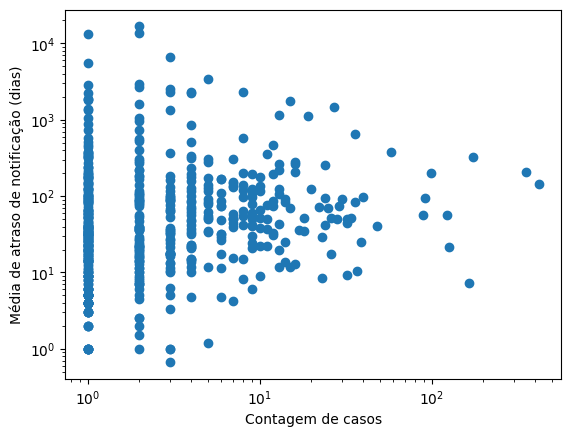

ID_MUNICIP
110002      95.00
110005       0.00
110011      12.75
110015    1130.37
110020      22.27
           ...   
521720      31.00
521740      86.00
521880     155.00
522050       8.00
530010     254.00
Name: ATRASO_NOT, Length: 598, dtype: float64

In [16]:
def questao_10(datapath = DATA):
    atraso = pd.read_parquet(datapath)
    # Realizando os mesmos processos da questão 8
    atraso["DT_NOTIFICACAO"] = pd.to_datetime(atraso["DT_NOTIFIC"])
    atraso["DT_SINTOMAS"] = pd.to_datetime(atraso["DT_SIN_PRI"])
    atraso["ATRASO_NOT"] = atraso["DT_NOTIFICACAO"] - atraso["DT_SINTOMAS"]
    # Convertendo a coluna de atraso para inteiros
    atraso["ATRASO_NOT"] = atraso["ATRASO_NOT"].dt.days
    # Agrupando e calculando a contagem e a média por município
    atraso_por_municipio = pd.DataFrame(atraso.groupby("ID_MUNICIP")["ATRASO_NOT"].agg(["count", "mean"]))

    # Gerando o gráfico
    plt.scatter(atraso_por_municipio["count"], atraso_por_municipio["mean"])
    # Configurando as escalas dos eixos para logarítmicas
    plt.xscale("log")
    plt.yscale("log")
    # Configurando os títulos dos eixos
    plt.xlabel("Contagem de casos")
    plt.ylabel("Média de atraso de notificação (dias)")
    plt.show()

    # Retornando uma série com as médias de atraso por município
    return atraso.groupby("ID_MUNICIP")["ATRASO_NOT"].mean().round(2)

questao_10()